# Programming Assignment 2

authors: Daniel Tabas (TA) and Chase Dowling

contact: dtabas@uw.edu

course: EE PMP 555, Spring '22

## L1, L2 Loss Functions, Bias and Regression with regularization

### Loss functions and norms

In the previous notebook we reviewed linear regression from a data science perspective. The regression task was roughly as follows: 1) we're given some data, 2) we guess a basis function that models how the data was generated (linear, polynomial, etc), and 3) we chose a loss function to find the line of best fit. We saw how using the sum of squares gives us the Ordinary Least Squares problem; given $N$ data samples, the loss function $\mathcal{L}$ looked like,<p>


<center> $\mathcal{L}(y, \hat{y}) = \sum_{i = 1}^{N} (y_{i} - \hat{y}_{i})^{2}$. </center>

This may look familiar; this is essentially the equation of the magnitude of a vector, or the Euclidean distance, otherwise known as the L2 norm, which we saw briefly in the previous notebook. For a real vector $v$ with $n$ dimensions, this is defined as,

<center> $||v||_{2} := \sqrt{\sum_{i = 1}^{n} v_{i}^{2}}$, </center>

where each $v_{i}$ is a dimension of the vector $v$. If the error $e = y - \hat{y}$, then the loss function $\mathcal{L} = ||e||^{2}_{2}$ is the square of the L2 norm of the vector of errors. It's helpful to represent data as matrices, and errors as vectors, as there are many norms we can choose from to be loss functions. Using, and as we will see, _combining_ different norms have different effects on the outcomes of the regression problem. We'll look at a few in this notebook.

### Bias

In the first notebook, when we introduced linear regression we glossed over bias. Let's go over what we mean by bias and how to incoporate it into a regression problem. Previoius we saw that in linear regression we need to find weight estimates $w$ such that $w$ minimzes $\mathcal{L}(y, \hat{y})$ where in vector notation for $k$ dimensional $x$,

<center>$\hat{y} = w^{T}x$</center>

Recall that the equation of a line in one dimension is $y = w_1x + w_2$. The $w_2$ is a linear bias term because it translates the entire model up and down along the depend axis, $y$. We use $w_1$ and $w_2$, rather than the traditional $m$ and $b$ because we can represent a linear bias term in vector notation easily. If we write the two dimensional vectors, $\vec{w} = <w_1, w_2>$, and $\vec{x} = <x, 1>$, the dot product looks like

<center>$\vec{w}^{T}\vec{x} = w_1 \cdot x + w_2\cdot 1$,</center>

which is precisely the equation of a line with a bias term that we were after. Oftentimes in machine learning you might see the OLS loss function written like,

<center>$\mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n} ||w_1^{T}x_{n} + w_{2} - y_{n}||_{2}^{2}$.</center>

This is inconvenient because when we go to compute the derivative of the loss function with respect to the weights $w_{i}$ we have to compute multiple derivatives, so if we append a 1 to end of the vector $x_{n}$, we can incorporate a bias term without seeing weights $w$ spread out all over the place. This is useful because we want to think of data as matrices where each row is a sample, and each column is a feature. A column of 1's is just a bias feature in the data, and the OLS loss function in matrix notation with this bias feature looks like, 

<center>$\mathcal{L}(y, \hat{y}) = ||Xw - Y||_{2}^{2}$,</center>

and as we saw in the previous notebook, it's much easier to find the closed form solution with matrix notation. That's one reason why virtually all popular data science tools will represent data as a matrix.

### Regularization

You may have heard the saying that the simplest explanation is often the best one. This can hold in machine learning as well. The following code compares the performance of two models, a (simple) second-order polynomial and a (complex) ninth-order polynomial, on some noisy data. Run it several times to see the range of possible outcomes.

Weights for second-order model:
[0.029772256681336512, -0.0014627877437327907, 0.8926913073123143]
Weights for ninth-order model:
[0.014371697954157145, -1.1506660157467539, -1.2635640117704958, 6.877162642172031, 11.319716046452605, -9.040187654711445, -15.635316801546836, -0.30013018086208376, 6.085594395757095, 3.9077645038597666]


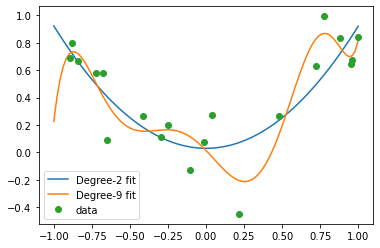

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data by drawing noisy samples from a quadratic function:
N = 20
x = np.sort(np.random.uniform(-1,1,N)) # randomly sample inputs
eps = np.random.randn(N)*.2 # noise
y = x**2 + eps # noisy outputs

# Function to generate fit:
def poly_fit(x,y,degree):
    X = np.vstack([x**i for i in range(degree+1)]).T # Polynomial features. Note that the bias term is included, since i starts at 0
    w = np.linalg.inv(X.T@X)@X.T@y # optimal weights
    return w

# Function to test fit:
def test_fit(w,degree):
    N_test = 100
    x_test = np.linspace(-1,1,N_test) # test data (query points)
    X_test = np.vstack([x_test**i for i in range(degree+1)]).T # polynomial feature transformation of test data
    y_hat = X_test@w
    plt.plot(x_test,y_hat,label=f'Degree-{degree} fit')
    
# Second-order fit:
w = poly_fit(x,y,2)
test_fit(w,2)
print('Weights for second-order model:')
print(list(w))

# Ninth-order fit:
w = poly_fit(x,y,9)
test_fit(w,9)
print('Weights for ninth-order model:')
print(list(w))

plt.plot(x,y,'o',label='data')
plt.legend()
plt.show()

Which model performs better? Which model has weights with larger magnitude?

The wacky behavior of the ninth-order model is a phenomenon known as overfitting. The poor performance of this model illustrates the idea that simpler is often better. If we don't know what degree polynomial to choose, we can prioritize simplicity by aiming for models with smaller weights.

Regularization is a mathematical technique for choosing simpler models over more complicated ones by encoding a preference for smaller weights. This is achieved by augmenting the loss function with a term that penalizes the selection of large weights:

<center> Ridge regression (L2 regularization): $\mathcal{L}_{ridge}(w) = ||Xw - Y||^{2}_{2} + \lambda||w||_2^2$</center>

<center> LASSO regression (L1 regularization): $\mathcal{L}_{LASSO}(w) = ||Xw - Y||^{2}_{2} + \lambda||w||_1$</center>

In these loss functions, the first term says that we want $w$ to be an accurate predictor of the observed data, and the second term says that we want $w$ to be small in magnitude. The scalar $\lambda > 0$ can be tuned in order to express how much we care whether $w$ is small.

### L1 vs. L2 regularization

Which norm should we choose for the regularization term? If all we care about is the size of the weights, then L2 regularization makes sense. However, sparsity (having only a few nonzero weights) is another powerful notion of simplicity, and L1 regularization does a better job of promoting sparsity. To see why, consider an example where $w$ is a scalar. Let's graph the penalty term as a function of $w$:

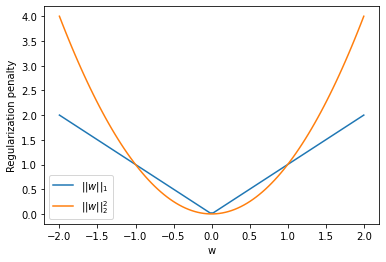

In [62]:
x = np.linspace(-2,2,100)
y1 = np.abs(x) # L1-norm (lasso penalty)
y2 = x**2 #L2-norm squared
plt.plot(x,y1,label=r'$||w||_1$')
plt.plot(x,y2,label=r'$||w||_2^2$')
plt.legend()
plt.xlabel('w')
plt.ylabel('Regularization penalty');

The L2 penalty is larger away from 0, but the L1 penalty is larger near 0. Therefore, L2 regularization is more likely to lead to a weight vector $w$ that has some small-but-nonzero weights, while L1 regularization is more likely to lead to some coefficients being exactly 0. L1 regularization is popular because sparse models are easier to interpret.

## Linear regression and DC power flow



In class we learned that the DC approximation of the power flow problem _linearizes_ the relationship between the phase angle and power injections over a power grid. In this notebook we'll use linear regression to estimate the phase angle, line characteristics, power injections, flows, under various conditions.

<center> Figure 2 <center>

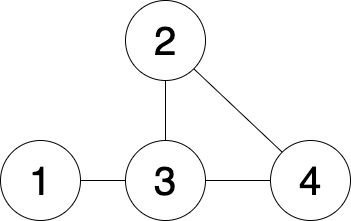

First we'll need to go over a few definitions and matrices that you saw in class. Fig. 1 illustrates an example 4-bus power system. Each _node_ in the graph is an electrical bus, and each _edge_ is a power line.

In AC (DC) power flow, electricity is subject to impedance (resistance) over the power lines. We can represent this with a special $n x n$ matrix which characterizes this impedance at each node and between nodes. Based on how the power flow problem is simplified, the values of these matrix are called admittance or susceptance because these values become inverted, or only represent a real or imaginary part of the power flow. Regardless, the structure remains the same; we'll define the admittance matrix, $B$, as

<center>$B_{i,j} = \begin{cases} \sum_{k=1,\ldots n} b_{i,k} & i = j \\ -b_{i,j} & \text{otherwise} \end{cases}$</center>

If two nodes $i,j$ are connected, the line has admittance $b_{i,j}$. The diagonal elements are the sum of the admittances of the lines connected to that node. The important takeaway is that the matrix $B$ characterizes the resistivity properties of the power lines and the power line topology.

For a network, or _graph_ like the example in Fig. 1 with $n$ nodes and $m$ edges, the node-edge incidence matrix is an $n x m$ matrix $F$ defined as follows. First, we assign a _direction_ to each edge such that it has a _head_ at one node and a _tail_ at the other node. Each row in the node-edge incidence matrix corresponds to a directed edge. For row $i$, element $f_{ij}$ is assigned a value of $1$ if node $j$ is at the head of edge $i$, $-1$ if node $j$ is the tail, and $0$ otherwise:

<center>$f_{i,j} = \begin{cases} 1 & \text{if node j is the head of edge i} \\-1 & \text{if node j is the tail of node i} \\ 0 & \text{otherwise} \end{cases}$</center>

In our application we'll scale these 1's a 0's by the admittance $b$, so that, 

<center>$f_{i,j} = \begin{cases} b_{ij} & \text{if node j is the head of edge i} \\-b_{ij} & \text{if node j is the tail of node i} \\ 0 & \text{otherwise} \end{cases}$</center>

In power engineering often time we'll assume a nominal voltage of 1 so that the power flow between buses is entirely characterized the by the AC phase angle difference between buses. If the phase angle differences are small, we can use the small angle approximation to _linearize_ the AC power flow equations. This is called the DC approximation as it resembles the equations for DC power flow. For a vector of bus voltage angles $\boldsymbol{\theta}$ and unit voltage, then the power injection at each node,

<center>$\boldsymbol{p} = B \boldsymbol{\theta}$</center>

and the power _flow_ $\boldsymbol{f}$ along each line equals,

<center>$\boldsymbol{f} = F\boldsymbol{\theta}$

These are just linear equations, like we've seen in the previous homeworks. Moreover, phase angles are very difficult to measure, and we often work with many noisy samples of power injections and flows. For convenience, we can stack the two linear equation in a single equation:

<center>$\boldsymbol{z} = H\boldsymbol{x}$
    
where $x = \theta$.

In the following exercises we'll look at estimating the phase-angle state of the grid.
    
The linear system $z = Hx$ is overdetermined. In order to find a unique solution that satisfies various operational constraints, there are tricks and techniques that power engineers use, like incorporating a so-called slack bus, or using the Kron reduction, to determine values that the engineer cares about. We'll use what we've learned thus far: we can write this overdetermined system as,

<center>$Hx - z = r$</center>

where r is some residual error between a phase angle vector $x$ and the power flows and injections $z$. If we wrap the left hand side up in a 2-norm,

<center>$||Hx - z||_{2}^{2} = r$</center>

minimizing the residual $r$ is just like the least squares problem. In the following problems we'll solve for the power injections and line flows using least squares, and examine the effect bad data has on our solution, and how we can adapt to it.

In [67]:
#here we'll construct the neccessary matrices for the above example network

import numpy as np
import matplotlib.pyplot as plt

#node edge incidence matrix scaled by admittance
#these are just arbitrary admittance values for this assignment
F = np.array([[3,0,-3,0],
              [0,5,-5,0],
              [0,5,0,-5],
              [0,0,4,-4]])

self_admittance = np.sum(np.abs(F), axis=0)

off_diag = np.array([[0,0,-3,0],
                     [0,0,-5,-5],
                     [-3,-5,0,-4],
                     [0,-5,-4,0]])

#admittance matrix
B = np.diag(self_admittance) + off_diag

#stacked
H = np.vstack((F, B))

In [68]:
#true flows and power injections for reference

f = 0.01*np.array([5,-2,-1,2])
p = 0.01*np.array([5,-3,-1,-1])

z = np.expand_dims(np.append(f, p), axis=1)

[[ 0.05]
 [-0.02]
 [-0.01]
 [ 0.02]
 [ 0.05]
 [-0.03]
 [-0.01]
 [-0.01]]


In [70]:
#to simplify our code, we can now use the least squares method in sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import linear_model

#here's an example of how to use least squares to find the lowest energy solution to an 
#overdetermined linear system, in this case we have a _single_ sample of z

model = linear_model.LinearRegression().fit(H, z)

#notice that the object model isn't the vector x
print("Output of linear_model.LinearRegression().fit() method")
print(model)
print("\n")

#it's an object with a large number of attributes, we can inspect them with the native Python function dir():
print("Attributes of model object")
print(dir(model))
print("\n")

Output of linear_model.LinearRegression().fit() method
LinearRegression()


Attributes of model object
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']




In [71]:
#notice that the "Methods" section of the LinearRegression manual page linked above lists 
#several attributes that appear in the list we printed with dir(). We care about 'coef_', this is the vector x
print("Solution")
print(model.coef_)
print("\n")

#we can set this value to a variable and look at the error
x_hat = model.coef_.T  #transpose it from (1,8) to (8,1)
loss = np.linalg.norm(H.dot(x_hat) - z, 2)

print("Error")
print(loss)
print("\n")

Solution
[[ 0.01457074 -0.00687391 -0.0019691  -0.00572774]]


Error
0.008011950937204




## Homework questions

### Problem 1: L1 regression

Let's look at how the LASSO regression problem works. There is no closed form solution so we often use a form of gradient descent called coordinate descent. For now we won't worry about how coordinate descent works, but just go ahead and see how the LASSO solution looks for various values of $\lambda$. First read through the following example code.

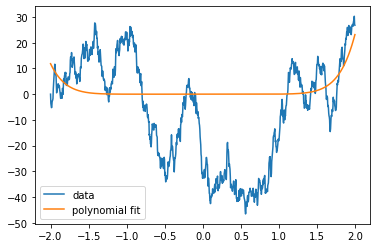

coefficients: 
[-0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.          0.01148003  0.01730517]


In [73]:
#We're going to try and fit a polynomial function to a noisy time series and
#see how various values of lambda influences the fit

def poly_basis(x, k):
    #this function will help us quickly generate a polynomial basis
    #k is the largest polynomial degree the basis runs to
    out = []
    for i in range(k+1):
        #notice that first value of i will be 0, so the bias term is included
        out.append(np.power(x, i))
    return(out)

X_ran = np.arange(-2,2,0.004)  #the range of values we'll consider

X_poly_basis = np.asarray(poly_basis(X_ran, 10)).T    #the range of values passed through a polynomial basis

#generate a noisy time series
Y = [0.0]
for i in range(999):
    Y.append(Y[-1]+np.random.normal(0,2))
    
#we need to solve for the weights w such that
#X_poly_basis.dot(w) = Y, we'll use the LASSO objective that combines L2 and L1 loss

#import the LASSO solver
from sklearn import linear_model

#we'll use the built in Lasso solver in Scikit-learn
#the input value alpha is the regularization constant lambda as we've written above
#don't mess with the input options other than alpha, for example, fit_intercept is default to be true
#and assumes you didn't include the bias term in your basis function
lasso_regressor = linear_model.Lasso(alpha=100, fit_intercept=False, tol=0.01, max_iter=10000)

#this fits the outputs Y to the polynomial basis of inputs in the range -2 to 2
lasso_regressor.fit(X_poly_basis, Y)

#these are the weights the model learns
w = lasso_regressor.coef_

#we've used a large regularization constant, alpha=100, notice the model doesn't fit
#very well

plt.plot(X_ran,Y, label="data")
plt.plot(X_ran,X_poly_basis.dot(w), label="polynomial fit")
plt.legend()
plt.show()

print("coefficients: ")
print(w)

Now, fit with the LASSO regressor for several values of alpha between 0.001 and 100.0. Plot at least five different polynomial fits like the above for different values of alpha. For each alpha, print the coefficients that it solves for along with the plot and describe what's happening.

In [ ]:
# insert your code here

### Problem 2: Norm balls

The L1-and L2-norms are special cases of the Lp-norm, which is a family of functions that define a metric space where the data "lives". One way to think of machine learning tasks is transforming that metric space until the data resembles something manageable with simple models, almost like untangling a knot. The Lp-norm for an $n$ dimensional vector $x$ is defined as,

<center>$||x||_{p} = (\sum_{i=1}^{n}|x_{i}|^{p})^\frac{1}{p} $</center>

If we take the limit $p \rightarrow \infty$, then the L-$\infty$ norm gives us a special function. For multiple values of p, plot the unit ball in 2 dimensions, and make a guess as to what the L-$\infty$ norm looks like. The unit ball is the value of the norm for vectors a distance of 1 away from the origin according to the norm. Below are examples for the 1 and 2 norms. If p is too large, you won't be able to plot it with the functions I've given, so look at values of p like 3, 4, and 5 and then make a guess.

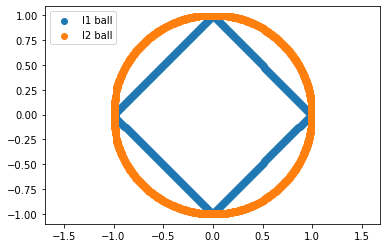

In [75]:
def l1_norm(x):
    out = 0
    for x_i in x:
        out += np.abs(x_i)
    return(out)

def l2_norm(x):
    out = 0
    for x_i in x:
        out += np.power(x_i, 2)
    return(np.sqrt(out))

x_1 = np.arange(-1,1,0.01)
x_2 = np.arange(-1,1,0.01)
tol = 0.01

l1_unit_ball_values = []
l2_unit_ball_values = []

for x_i in x_1:
    for x_j in x_2:
        l1 = l1_norm([x_i, x_j])
        l2 = l2_norm([x_i, x_j])
        if l1 > 1 - tol and  l1 < 1 + tol:   #check to see if the value of the L1 norm is close to 1
            l1_unit_ball_values.append([x_i, x_j])
        if l2 > 1 - tol and l2 < 1 + tol:    #check to see if the value of the L2 norm is close to 1 
            l2_unit_ball_values.append([x_i, x_j])
        
l1_ball = np.asarray(l1_unit_ball_values) #transform the list of vectors/pairs into a numpy array
l2_ball = np.asarray(l2_unit_ball_values)

plt.scatter(l1_ball[:,0], l1_ball[:,1], label="l1 ball")
plt.scatter(l2_ball[:,0], l2_ball[:,1], label="l2 ball")
plt.legend(loc=2)
plt.axis('equal') #this makes the axes the same scale so that the circle isn't elliptical looking
plt.show()

In [ ]:
#add your code here, consider writing a more general
#function than l1_norm() or l2_norm() above for the lp_norm

### Problem 3: Linear state estimation in power systems

For this problem you'll need to read the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) carefully. You are given $k$ noisy samples of $z$: the line flows and power injections. Instantiate a linear model and find the solution $x$ of nodal phase angles. Print the loss (1 value across all samples). Hint: you're going to find an $x$ for each sample of $z$, we need to find the best $x$ the minimizes the loss for any $z$.

In [ ]:
#here are the samples, they are not formatted correctly, you'll need to format them correctly 
#in order to use linear_model.LinearRegression().fit()
samples_1 = []

for i in range(100):
    samples_1.append(z + np.random.normal(0,0.02,size=z.shape)) #the true value + some noise

In [ ]:
#insert your code here

### Problem 4: Weighted estimation

Our example power grid has very good power injection sensors with very little noise variance, and our cheaper line flow sensors have very high noise variance. In the example below, we show how to performed _weighted_ least squares, in order to bias the solution to rely on the high quality data more than the low quality data.

In [ ]:
weights = np.ones(z.shape)[:,0]  #the weights object must be 1-dimensional
model = linear_model.LinearRegression().fit(H, z, sample_weight=weights)  
x_hat = model.coef_.T

#here I've just passed in weights equal to 1, so the solution is unchanged

In [103]:
# Here, we generate some noisy samples where the injection sensors are accurate and the line flow sensors are noisy.

samples_2 = []

for i in range(100):
    injection_noise = np.random.normal(0,0.01,size=z[0:4].shape)  #variance equal to 0.01
    line_noise = np.random.normal(0,0.03,size=z[0:4].shape)       #variance equal to 0.03
    samples_2.append(z + np.expand_dims(np.append(line_noise,injection_noise),axis=1)) #the true value + some noise
    
samples_2 = np.asarray(samples_2)[:,:,0].T

Now, find a vector of sample weights that improves on the loss over the vector of weights all equal to 1.

In [ ]:
#insert your code here

### Problem 5: Eliminating outliers

We are again given a sequence of observations of power flows and injection, but there are several bad measurements. The noise is Gaussian; use what we know about the Gaussian distribution to derive a threshold-type means of eliminating outlier data. Compare the loss of the model with and without the outliers.

In [111]:
#100 x 8 array of z samples
samples_3_array = np.loadtxt("homework_2_data.txt")

(100, 8)


In [92]:
#insert your code here